# YAP Jupyter Interface ![yap.ico](attachment:yap.ico)

## Walkthrough and User Guide

The next cells show examples  of input output interaction with Prolog and Jupyter. We assume basic knowledge of both Prolog and Python/R/Jupyter. Notice that this is experimental software, subject to bugs and change. Also remember that 
  - all cells in the same page belong to the same process;
  - _magic_ refers to annotations that perform extra, non-trivial work
  - check the top=right ball right to the side of `YAP 6`: if empty the system is avsilable; otherwise, it is busy, 

### Basic Usage

Any Prolog system should be able to unify two terms:

In [ ]:
X=2                                                                                                     X= s 

In [ ]:
X=f(Y)

In [ ]:
f(X,['olá',X]) = f(`hello`,Z)

Unification may fail:

In [ ]:
f('olá',[X]) = f(`hello`,Z) 

In [ ]:
X=Y

You observe that the first time you press `shift-enter` or `ctl-enter`, YAP/Jupyter writes down `X=2`, the answer. If you press down `shift-enter` again, it writes `No (more) answers`  Pressing again returns you to the first answer, `X=2`:

- In YAP/Jupyter cells have a state that depends on how many answers you generated.

YAP also allows asking for ll solutions in a single run:

In [ ]:
between(1,100,I), J is I^I *


The YAP  `^` operator generates floating-point numbers for large exponentials. You can try replacing `^` by `**` in the cell: notice that the cell state is reset, as changes in the text of a cell may mean anything. 

In [ ]:
between(1,20,I), J is 20-I, IJ is I*J *


NB: in the current version, the states in a page are single-threaded, and only  one cell is active at a rime.

## Programming with cells

Cells can  store programs: that is wahat they do

The next cell shows a program to recognise state-checking predicates:

In [8]:
state_info(Name/Arity) :- 
    current_predicate(Name/Arity), 
    atom_concat(current,_,Name).
state_info(Name/Arity) :- 
    system_predicate(Name/Arity),
 atom_concat(current,_,Name).

reconsulting $stream(8)...
reconsulted fmem in module user, 2 msec 1488 bytes


Now you can query:

In [10]:
 state_info(P)

P = current_line_number/1


Notice that you need to consult the program cell first. We can just do both in the same cell: 

In [ ]:

generate_ith(I, I, [Head|Tail], Head, Tail).
generate_ith(I, IN, [_|List], El, Tail) :-
	I1 is I+1,
	generate_ith(I1, IN, List, El, Tail).

ith(V, In, Element, Tail) :- var(V), !,
	generate_ith(0, V, In, Element, Tail).
ith(0, [Head|Tail], Head, Tail) :- !.
ith(N, [Head|Tail], Elem, [Head|Rest]) :-
	M is N-1,
	ith(M, Tail, Elem, Rest).

ith(X,[1,2,3,4,5],4, T)



In [ ]:
%%bash

ls


### Magic

YAP allows the standard magics, buth with line and cell:

- line magics should be the first non-empty line, and must start with `%` followed immediately by the name.

- cell magics start with `%%` and must be the only magic in the cell.

You can use the completion mechanism to list all magics.


In [ ]:
%matplotlib inline

main :-
    python_import( matplotlib.pyplot  as plt ),
    python_import( numpy  as np ),
    T = np.arange(0.0, 2.0, 0.01),
    S = 1 + np.sin(2*np.pi*T),
    plt.plot(T, S),
    plt.xlabel(`time (s)`),
    plt.ylabel(`voltage (mV)`),
    plt.title(`About as simple as it gets, folks`),
    plt.grid(true),
    plt.savefig("test2.png"),
    plt.show().

main 

reconsulting $stream(8)...
reconsulted fmem in module user, 2 msec 4112 bytes


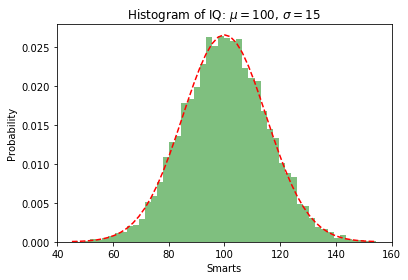

true


In [18]:
%matplotlib inline

main2 :-
    python_import( numpy as np ),
    python_import( matplotlib.mlab as mlab ),
    python_import( matplotlib.pyplot as plt ),

    /* example data */
    Mu = 100,  /* mean of distribution, */
    Sigma = 15,  /* standard deviation of distribution, */
    X = Mu + Sigma * np.random.randn(10000),
    NumBins = 50,
    /* the histogram of the data */
    t(n, bins, patches) := plt.hist(X, NumBins, normed=1, facecolor= `green`, alpha=0.5),
    /* add a `best fit` line */
    y := mlab.normpdf(bins, Mu, Sigma),
    plt.plot(bins, y, 'r--'),
    plt.xlabel('Smarts'),
    plt.ylabel('Probability'),
    plt.title('Histogram of IQ: $\\mu=100$, $\\sigma=15$'),
    /* Tweak spacing to prevent clipping of ylabel, */
    plt.show().
   
   main2


In [ ]:
Last, Prolog can talk to R, so you can get a Python to R bridge

In [23]:
:- [library(real)].

X <- c(1:10), x := X

reconsulting $stream(8)...
 % consulting library(real)...
  % reconsulting library(readutil)...
  % reconsulted /home/vsc/.local/share/Yap/readutil.yap in module readutil, 3 msec 7520 bytes
  % reconsulting library(debug)...
  % reconsulted /home/vsc/.local/share/Yap/debug.pl in module prolog_debug, 7 msec 46920 bytes
  % reconsulting library(system)...
  % reconsulted /home/vsc/.local/share/Yap/system.yap in module operating_system_support, 11 msec 85136 bytes
 % consulted /home/vsc/.local/share/Yap/real.pl in module real, 199 msec 307408 bytes
reconsulted fmem in module user, 207 msec 308304 bytes
X = [1,2,3,4,5,6,7,8,9,10]
